<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iter 0: Loss=24.3964
Iter 100: Loss=0.3909
Iter 200: Loss=0.3863
Iter 300: Loss=0.3862
Iter 400: Loss=0.3862
Iter 500: Loss=0.3862
Iter 600: Loss=0.3862
Iter 700: Loss=0.3862
Iter 800: Loss=0.3862
Iter 900: Loss=0.3862

MSE Scratch: 0.9755437454786199
MSE scikit-learn: 0.9755437477937203


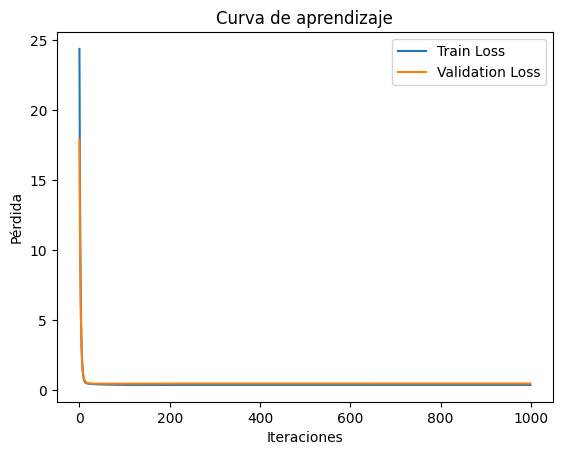

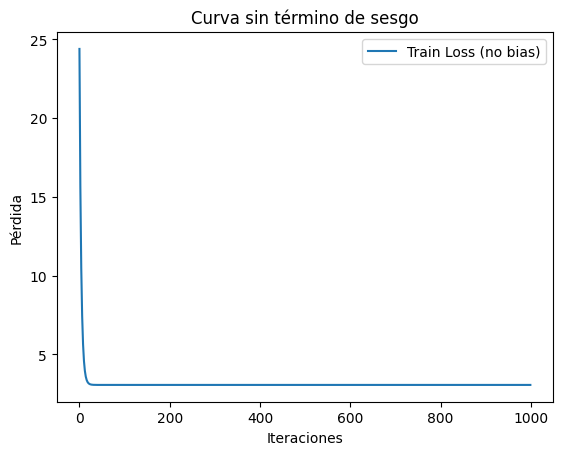

Coeficientes sin sesgo: [5.87256918]

MSE con features polinomiales: 0.9325494763999768

[Problema 10] Derivación:
La función de pérdida es:
    J(θ) = (1 / 2m) Σ (hθ(x(i)) - y(i))²

Gradiente respecto a θj:
    ∂J/∂θj = (1/m) Σ (hθ(x(i)) - y(i)) * xj(i)

Regla de actualización:
    θj := θj - α * ∂J/∂θj
lo que nos da la fórmula implementada.


[Problema 11] Óptimo global:
En regresión lineal, la función de pérdida J(θ) es convexa (un paraboloide).
Esto significa que solo existe un mínimo global y no hay mínimos locales.
Por eso, el descenso por gradiente converge siempre al óptimo global
(si la tasa de aprendizaje es adecuada).



In [ ]:

# REGRESIÓN LINEAL DESDE CERO - EJERCICIOS COMPLETOS (1-11)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# [Problema 4] Función MSE (fuera de la clase)

def MSE(y_pred, y):
    """
    Cálculo del error cuadrático medio.
    """
    mse = np.mean((y_pred - y) ** 2)
    return mse


# Clase: ScratchLinearRegression
class ScratchLinearRegression:
    """
    Implementación desde cero de la regresión lineal con gradiente descendente.
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    # [Problema 1] Hipótesis lineal

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    # [Problema 2] Gradiente descendente

    def _gradient_descent(self, X, error):
        m = X.shape[0]
        grad = np.dot(X.T, error) / m
        self.coef_ -= self.lr * grad


    # [Problema 5] Función de pérdida J(θ)

    def _loss_function(self, y_pred, y):
        m = y.shape[0]
        return np.sum((y_pred - y) ** 2) / (2 * m)


    # [Problema 6] Entrenamiento

    def fit(self, X, y, X_val=None, y_val=None):
        # Si no_bias es False, añadimos columna de 1s
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
            if X_val is not None:
                X_val = np.insert(X_val, 0, 1, axis=1)

        m, n = X.shape
        self.coef_ = np.zeros(n)

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            # Guardamos pérdidas
            self.loss[i] = self._loss_function(y_pred, y)
            if X_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_function(y_val_pred, y_val)

            if self.verbose and i % 100 == 0:
                print(f"Iter {i}: Loss={self.loss[i]:.4f}")

    # [Problema 3] Predicción

    def predict(self, X):
        if not self.no_bias:
            X = np.insert(X, 0, 1, axis=1)
        return self._linear_hypothesis(X)


# [Problema 6] Prueba con datos sintéticos

# Generamos datos artificiales
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:,0] + np.random.randn(100)

# Split train/val
X_train, X_val = X[:80], X[80:]
y_train, y_val = y[:80], y[80:]

# Modelo desde cero
model = ScratchLinearRegression(num_iter=1000, lr=0.1, verbose=True)
model.fit(X_train, y_train, X_val, y_val)

y_pred = model.predict(X_val)
print("\nMSE Scratch:", MSE(y_pred, y_val))

# Comparación con scikit-learn
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_val)
print("MSE scikit-learn:", mean_squared_error(y_val, sk_pred))

# [Problema 7] Curva de aprendizaje

plt.plot(range(model.iter), model.loss, label="Train Loss")
plt.plot(range(model.iter), model.val_loss, label="Validation Loss")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.title("Curva de aprendizaje")
plt.legend()
plt.show()

# [Problema 8] Sin término de sesgo

model_no_bias = ScratchLinearRegression(num_iter=1000, lr=0.1, no_bias=True)
model_no_bias.fit(X_train, y_train, X_val, y_val)

plt.plot(range(model_no_bias.iter), model_no_bias.loss, label="Train Loss (no bias)")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.title("Curva sin término de sesgo")
plt.legend()
plt.show()

print("Coeficientes sin sesgo:", model_no_bias.coef_)

# [Problema 9] Features polinomiales

X_poly = np.hstack([X, X**2, X**3])
X_train_poly, X_val_poly = X_poly[:80], X_poly[80:]

model_poly = ScratchLinearRegression(num_iter=2000, lr=0.05)
model_poly.fit(X_train_poly, y_train, X_val_poly, y_val)

y_pred_poly = model_poly.predict(X_val_poly)
print("\nMSE con features polinomiales:", MSE(y_pred_poly, y_val))


# [Problema 10] Explicación de la derivación de la fórmula

print("""
[Problema 10] Derivación:
La función de pérdida es:
    J(θ) = (1 / 2m) Σ (hθ(x(i)) - y(i))²

Gradiente respecto a θj:
    ∂J/∂θj = (1/m) Σ (hθ(x(i)) - y(i)) * xj(i)

Regla de actualización:
    θj := θj - α * ∂J/∂θj
lo que nos da la fórmula implementada.
""")

# [Problema 11] Óptimo global en regresión lineal

print("""
[Problema 11] Óptimo global:
En regresión lineal, la función de pérdida J(θ) es convexa (un paraboloide).
Esto significa que solo existe un mínimo global y no hay mínimos locales.
Por eso, el descenso por gradiente converge siempre al óptimo global
(si la tasa de aprendizaje es adecuada).
""")
